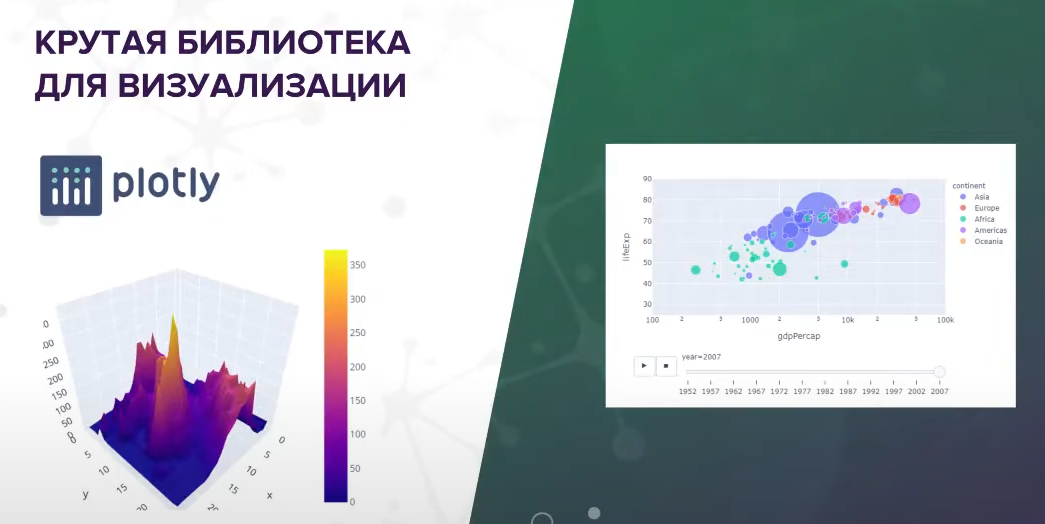

# <span style='color: purple'>Функции должны быть короткими и выполнять только одно действие . Если действий много, лучше разбить функцию на несколько меньших, что улучшит читаемость кода.

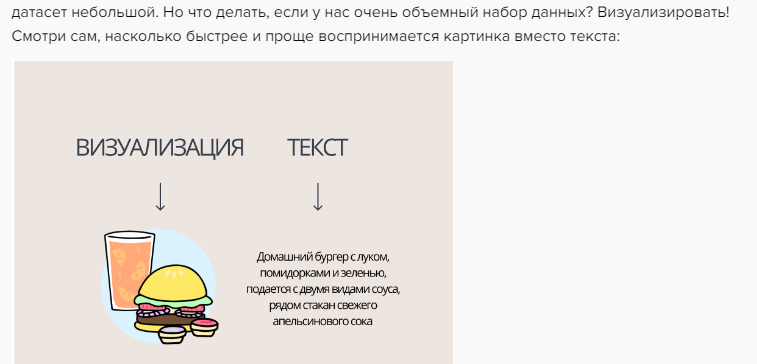

### Локальные переменные создаются при вызове функции и уничтожаются, когда функция завершает свою работу.

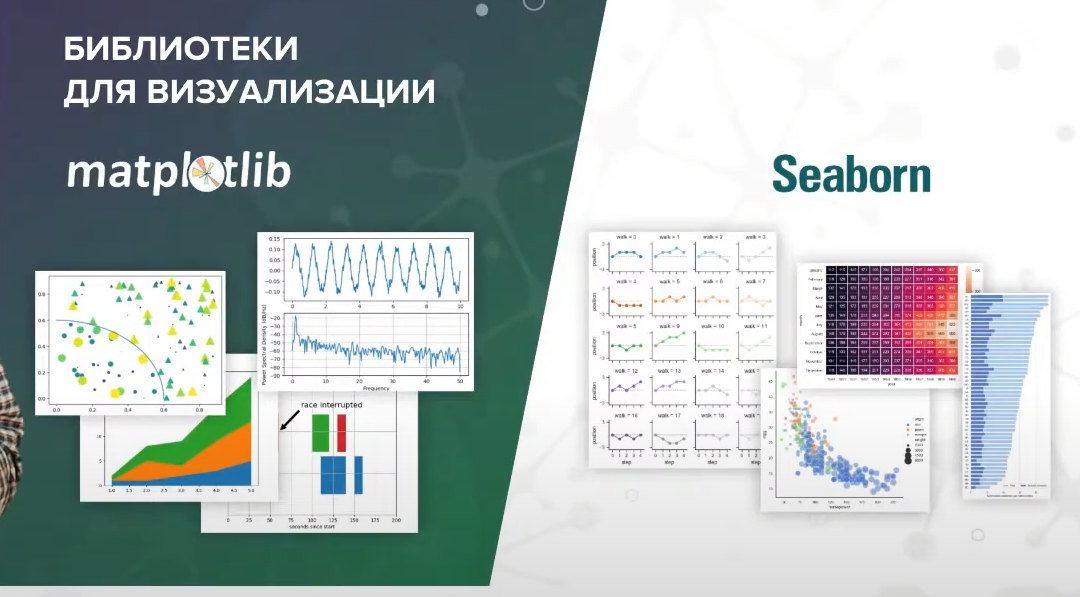

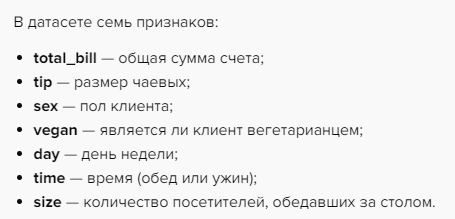

In [1]:
import pandas as pd

In [2]:
rest = pd.read_csv('restaurant.csv')
rest.head()

,total_bill,tip,sex,vegan,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


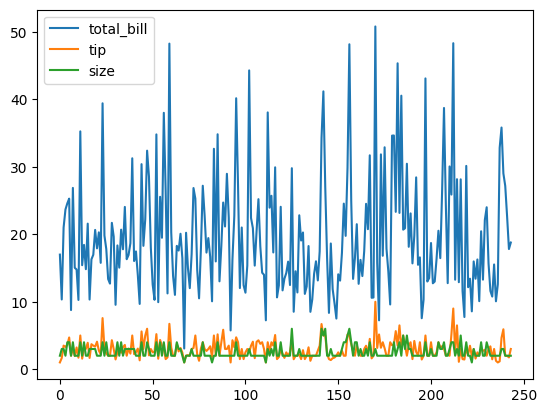

In [3]:
# Визуализирует все
rest.plot();

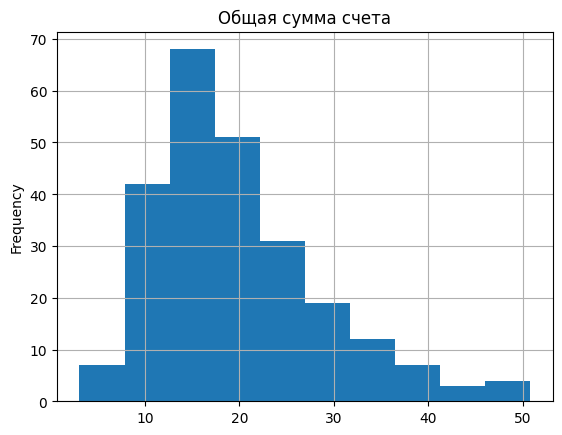

In [4]:
rest['total_bill'].plot(kind='hist', grid=True, title='Общая сумма счета');

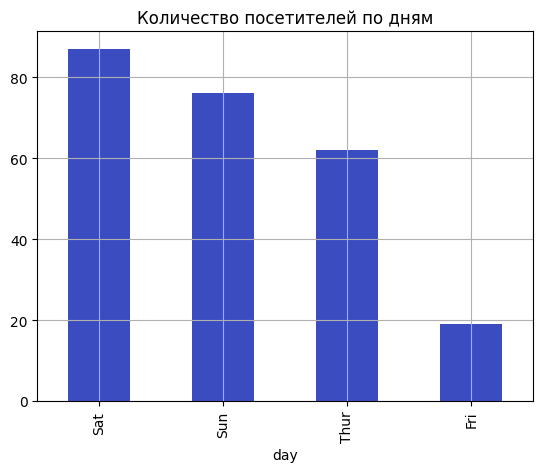

In [5]:
rest['day'].value_counts().plot(kind='bar', grid=True, colormap='coolwarm', title='Количество посетителей по дням');

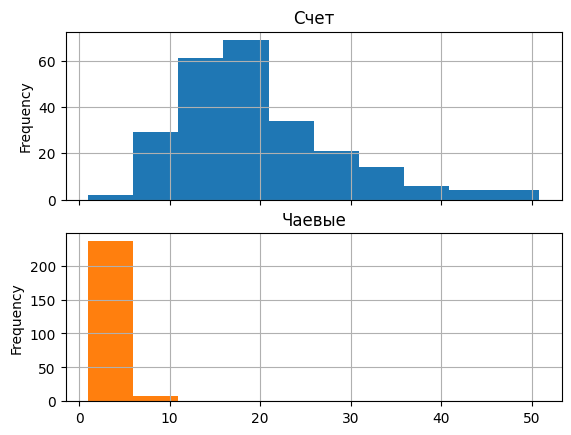

In [6]:
# Построим несколько графиков
rest[['total_bill', 'tip']].plot(kind='hist', grid=True, subplots=True, title=['Счет', 'Чаевые'], legend=False);

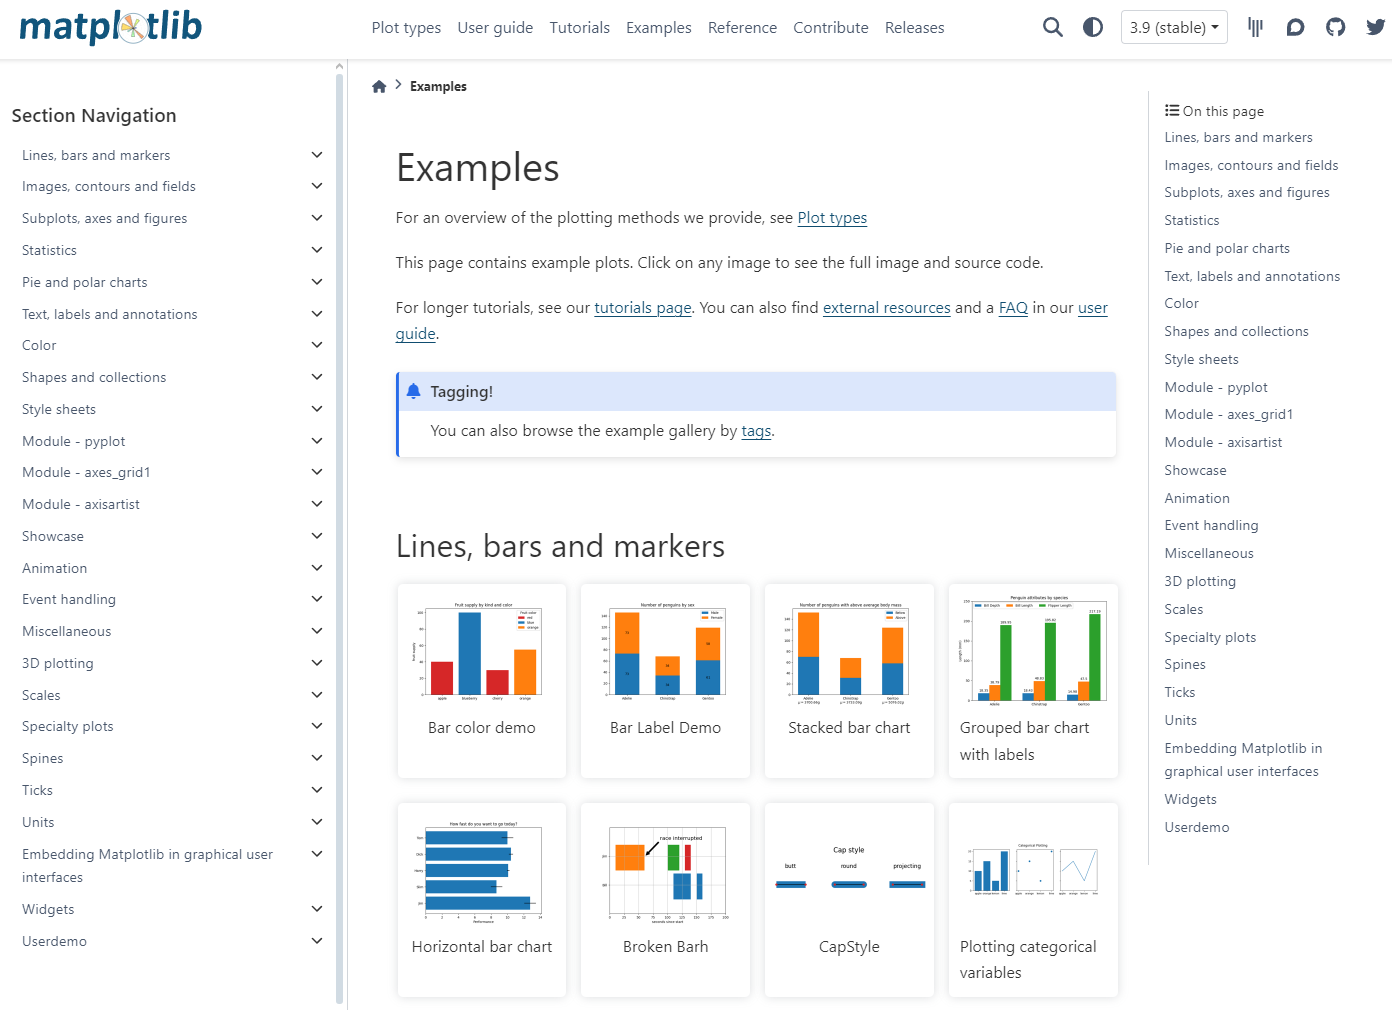

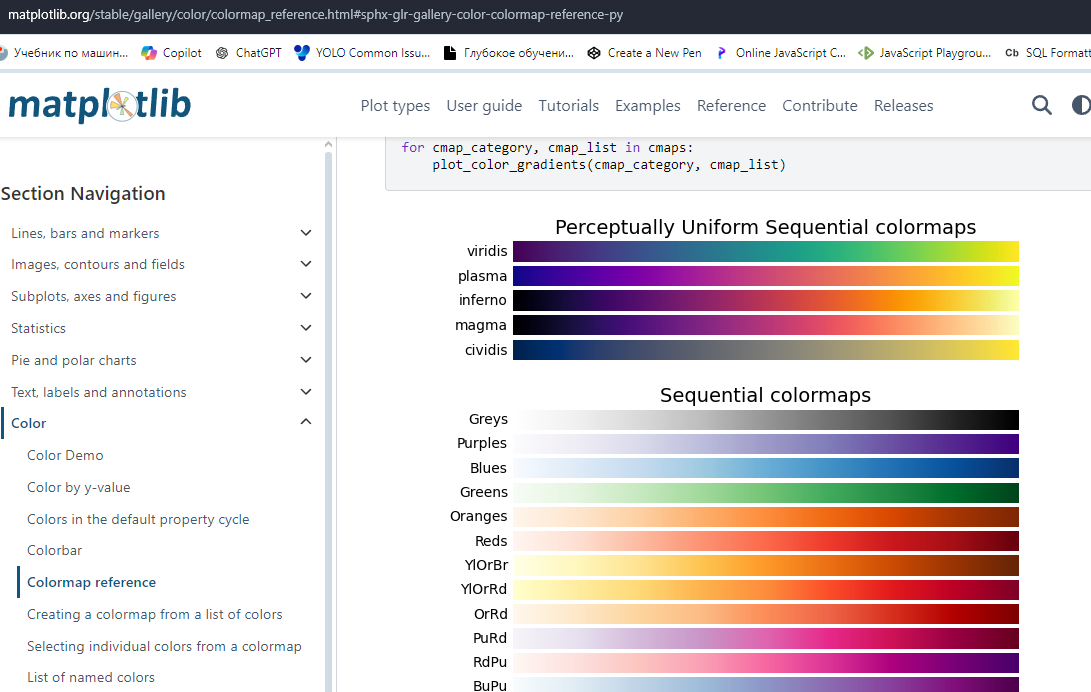

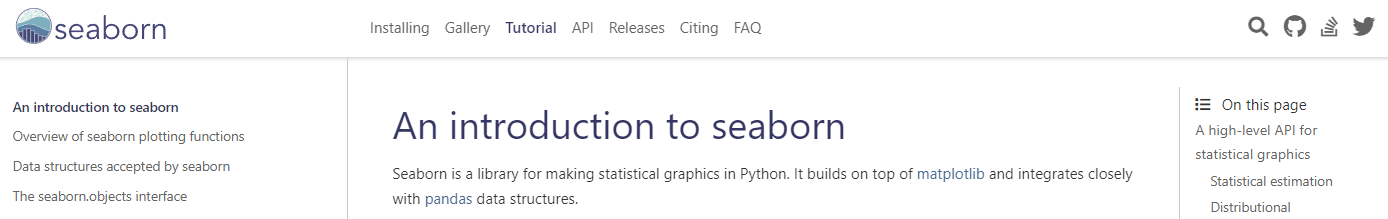

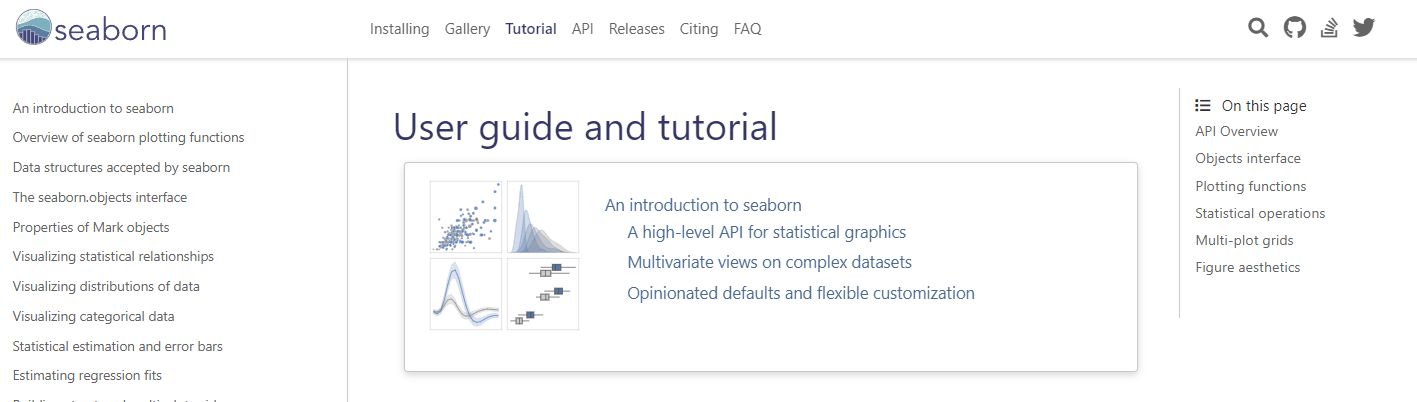

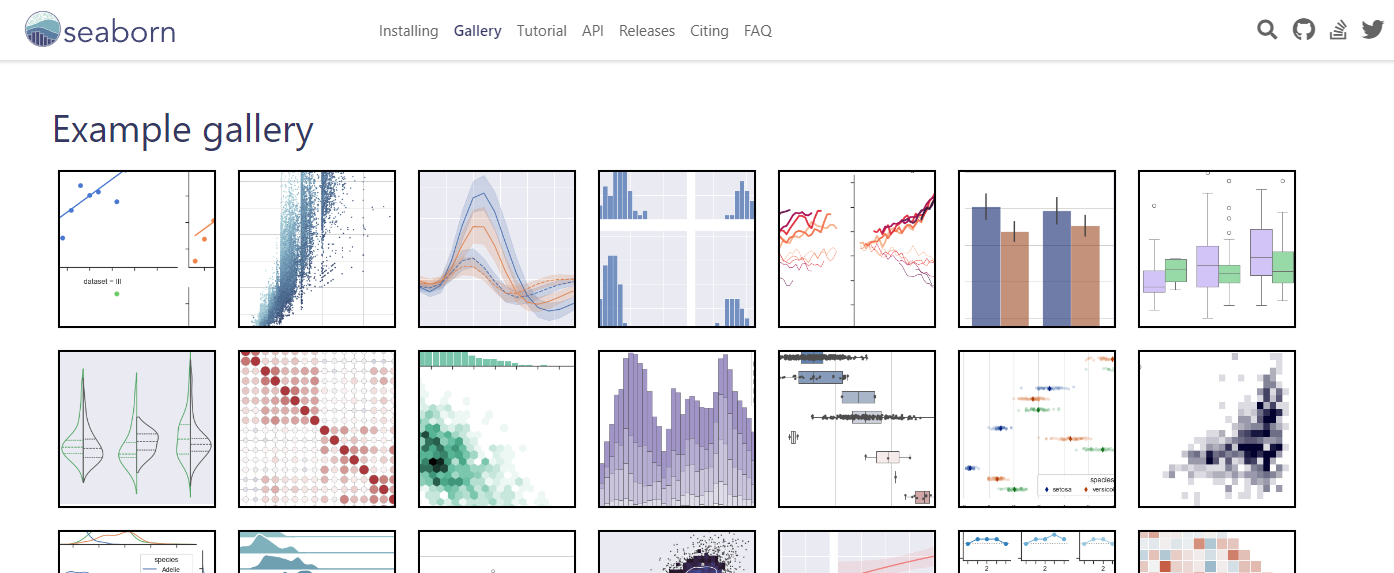

In [7]:
import matplotlib.pyplot as plt

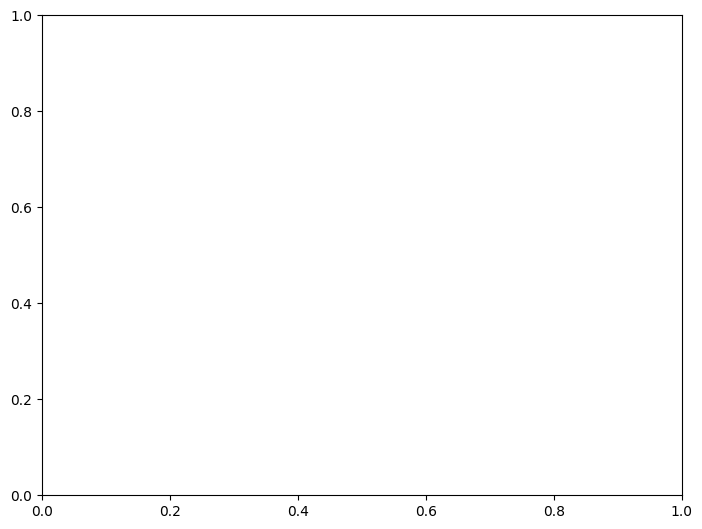

In [8]:
# Создаем фигуру и оси графиков
fig = plt.figure()  # Создаем объект фигуры
axes = fig.add_axes(rect=(0, 0, 1, 1))  # rect=(left, bottom, width, height)

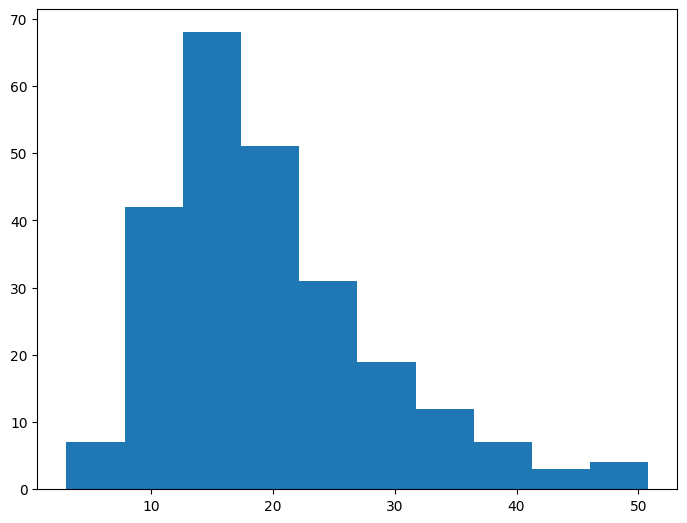

In [9]:
# Создаем ещё один объект изображения
fig = plt.figure()
axes = fig.add_axes(rect=(0, 0, 1, 1))
axes.hist(x=rest.total_bill);

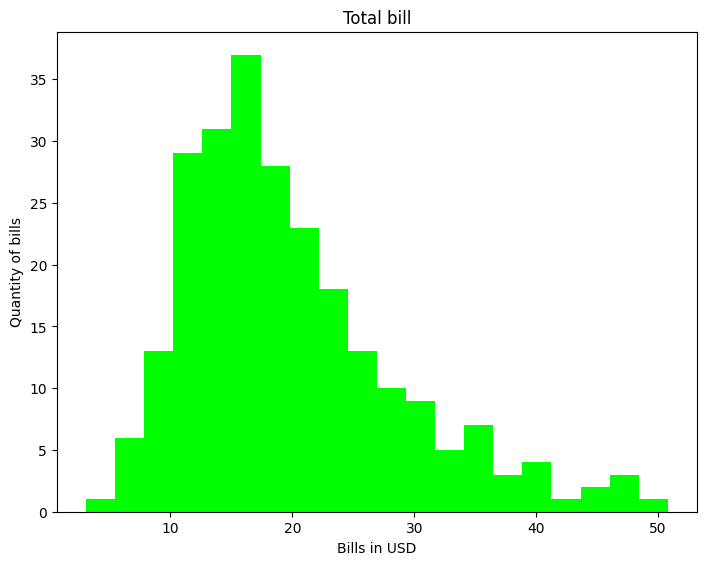

In [10]:
fig = plt.figure()
axes = fig.add_axes(rect=(0, 0, 1, 1))
axes.hist(rest['total_bill'], bins=20, color='lime')
axes.set_title('Total bill')
axes.set_ylabel('Quantity of bills')
axes.set_xlabel('Bills in USD');

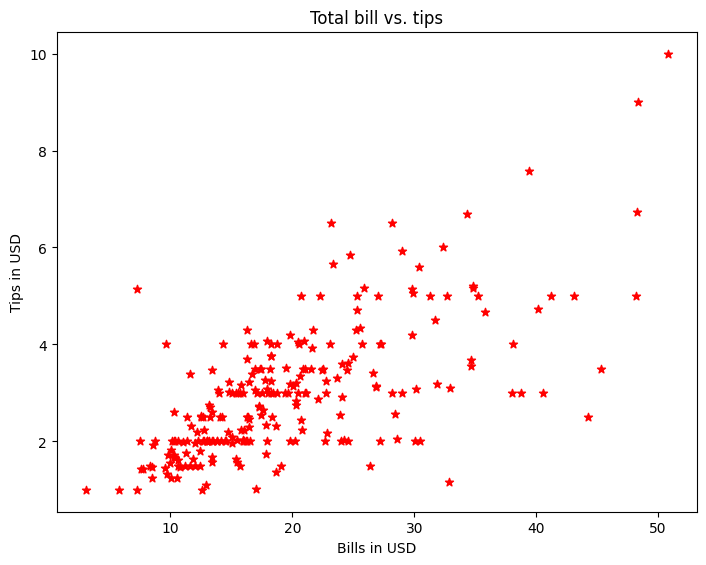

In [11]:
fig = plt.figure()
axes = fig.add_axes(rect=(0, 0, 1, 1))
axes.scatter(x=rest['total_bill'], y=rest['tip'], marker='*', color='red')
axes.set_title('Total bill vs. tips')
axes.set_ylabel('Tips in USD')
axes.set_xlabel('Bills in USD');

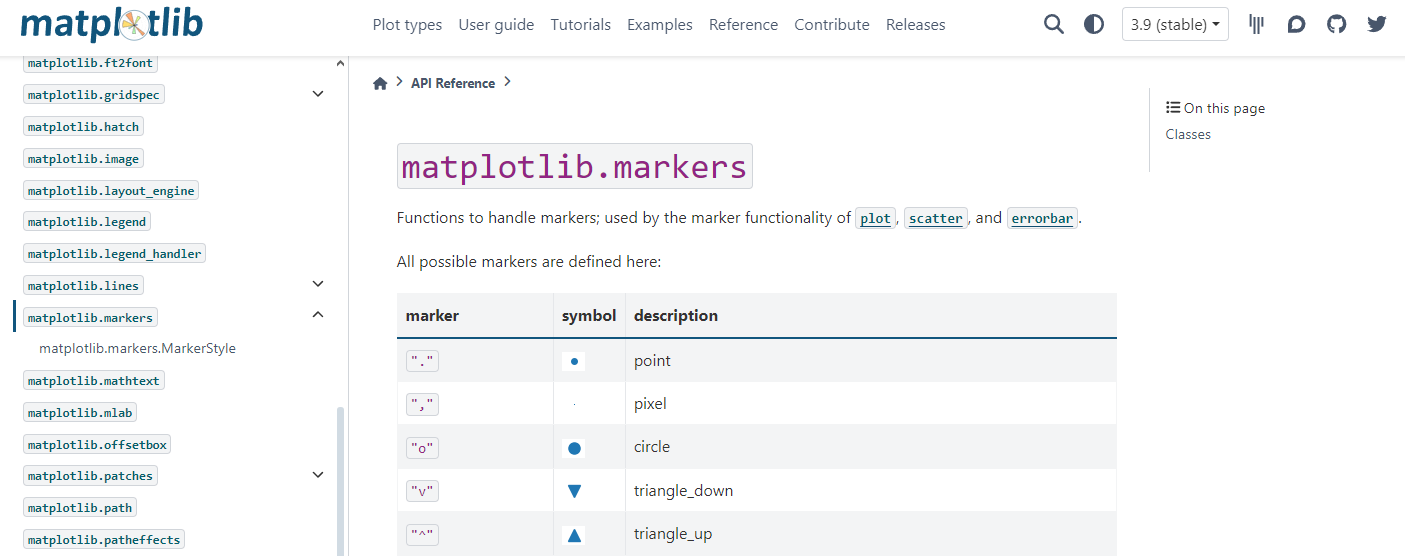

In [12]:
tips = rest.pivot_table(values=['tip', 'total_bill'], index='day', aggfunc='mean')
tips

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


# <span style='color: purple'>Matplotlib

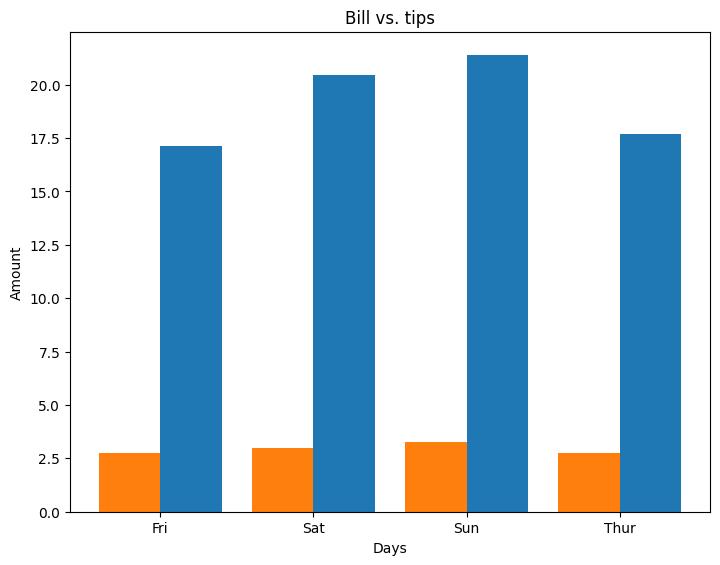

In [13]:
fig = plt.figure()
axes = fig.add_axes(rect=(0, 0, 1, 1))  # rect : tuple (left, bottom, width, height)

axes.bar(x=tips.index, height=tips['total_bill'], width=0.4, align='edge')
axes.bar(x=tips.index, height=tips['tip'], width=-0.4, align='edge')

axes.set_title('Bill vs. tips')
axes.set_ylabel('Amount')
axes.set_xlabel('Days');

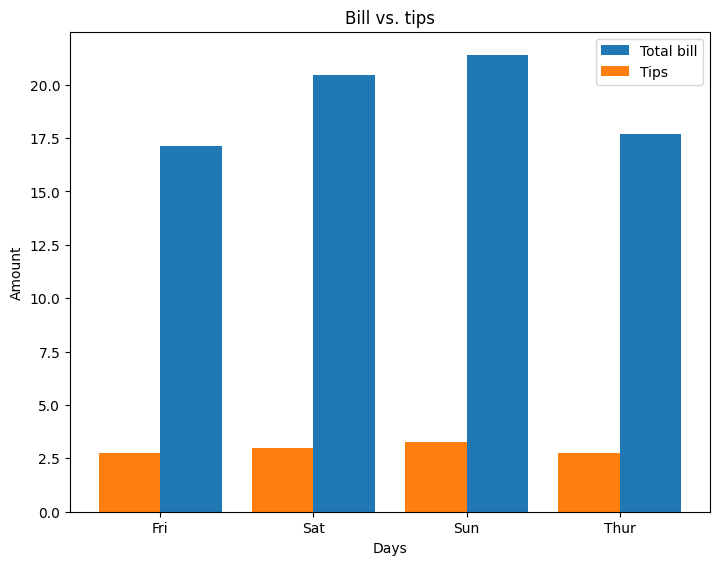

In [14]:
# Добавим легенду
fig = plt.figure()
axes = fig.add_axes(rect=(0, 0, 1, 1))

axes.bar(x=tips.index, height=tips['total_bill'], width=0.4, align='edge', label='Total bill')
axes.bar(x=tips.index, height=tips['tip'], width=-0.4, align='edge', label='Tips')

axes.set_title('Bill vs. tips')
axes.set_ylabel('Amount')
axes.set_xlabel('Days');

axes.legend(loc=1);

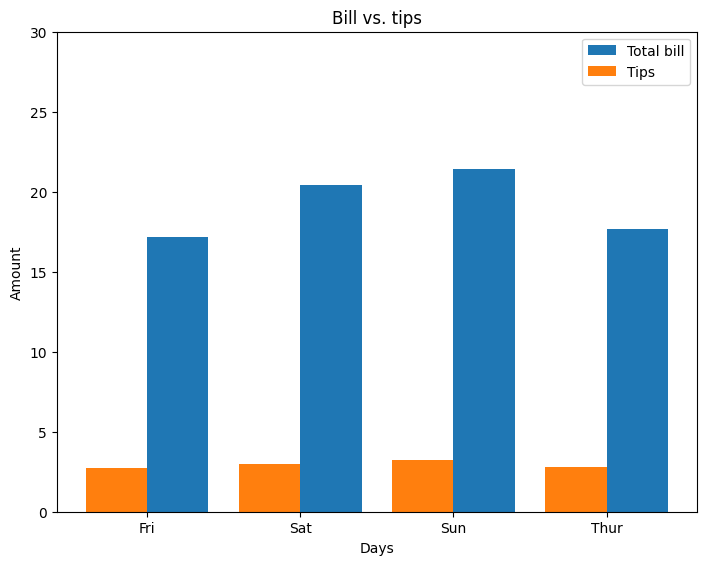

In [15]:
fig = plt.figure()
axes = fig.add_axes(rect=(0, 0, 1, 1))
axes.set_ylim(bottom=0, top=30)  # Меняем границы отображения

axes.bar(x=tips.index, height=tips['total_bill'], width=0.4, align='edge', label='Total bill')
axes.bar(x=tips.index, height=tips['tip'], width=-0.4, align='edge', label='Tips')

axes.set_title('Bill vs. tips')
axes.set_ylabel('Amount')
axes.set_xlabel('Days');

axes.legend(loc=1);

# <span style='color: purple'>Метод subplots() — создаем сразу несколько графиков

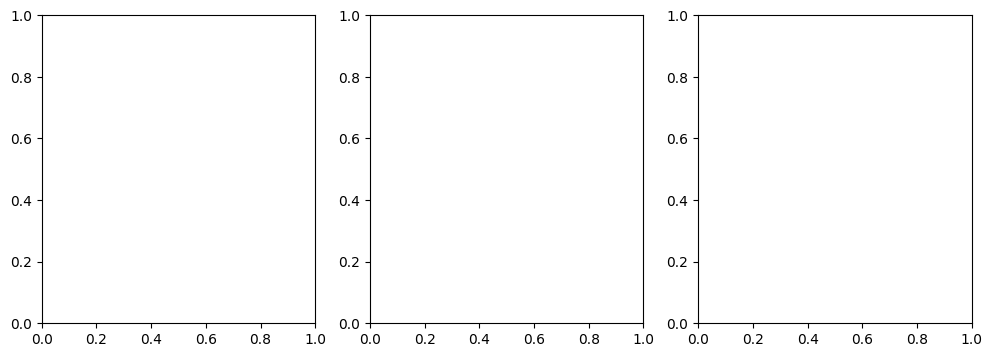

In [16]:
# Построим три пустых графика
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # axes содержит в себе массив объектов

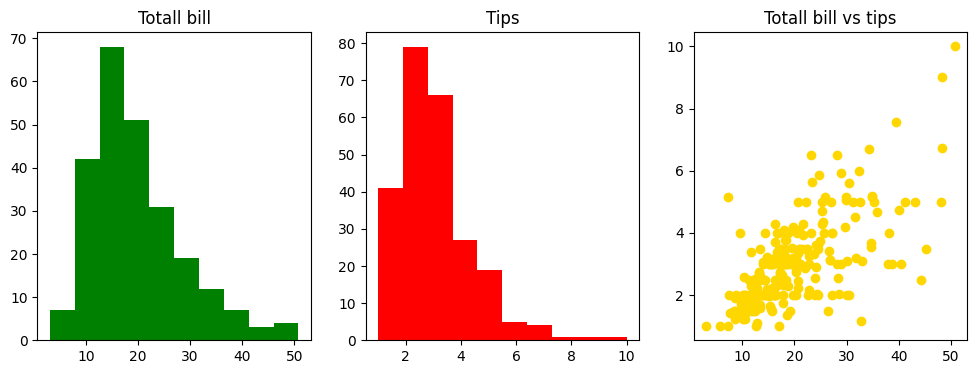

In [17]:
# Заполним эти пустые графики
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].hist(rest['total_bill'], color='green')
axes[0].set_title('Totall bill')

axes[1].hist(rest['tip'], color='red')
axes[1].set_title('Tips')

axes[2].scatter(x=rest['total_bill'], y=rest['tip'], marker='o', color='gold')
axes[2].set_title('Totall bill vs tips');

# <span style='color: purple'>Seaborn

In [18]:
import seaborn as sns

In [19]:
sns.set()  # Включает синеватый фон на графиках снизу

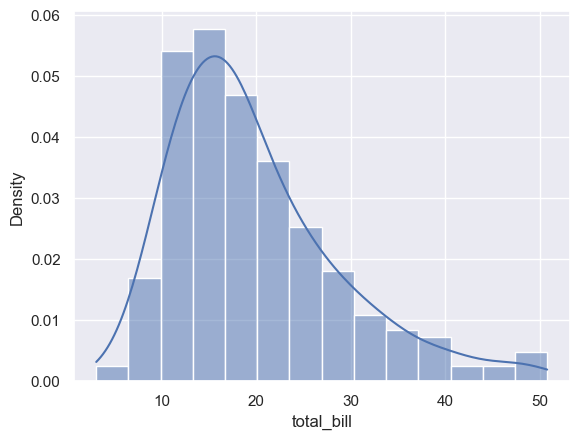

In [20]:
sns.histplot(data=rest['total_bill'], kde=True, stat='density');

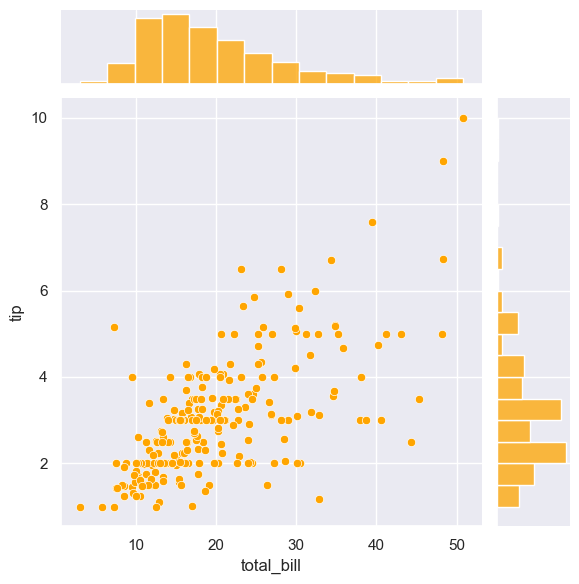

In [21]:
sns.jointplot(data=rest, x='total_bill', y='tip', color='orange');

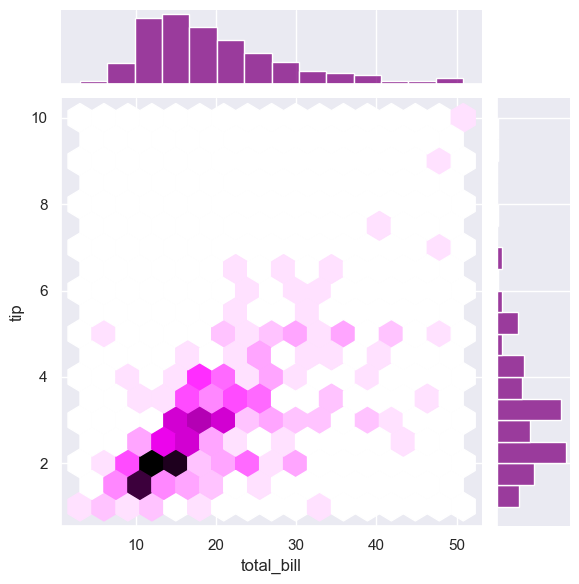

In [22]:
sns.jointplot(data=rest, x='total_bill', y='tip', kind='hex', color='purple');

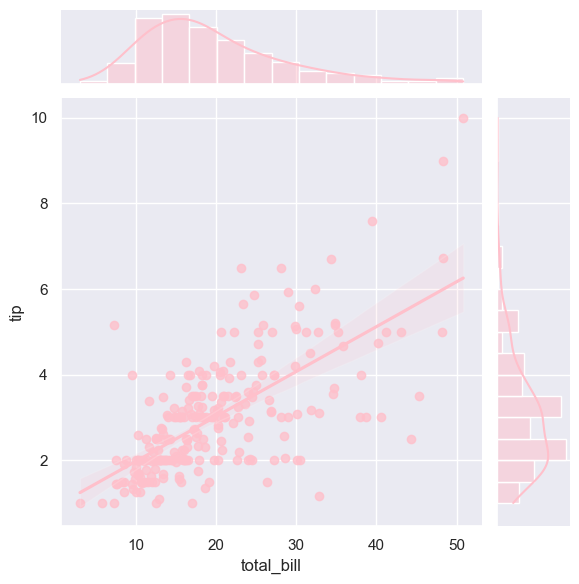

In [23]:
sns.jointplot(data=rest, x='total_bill', y='tip', kind='reg', color='pink');

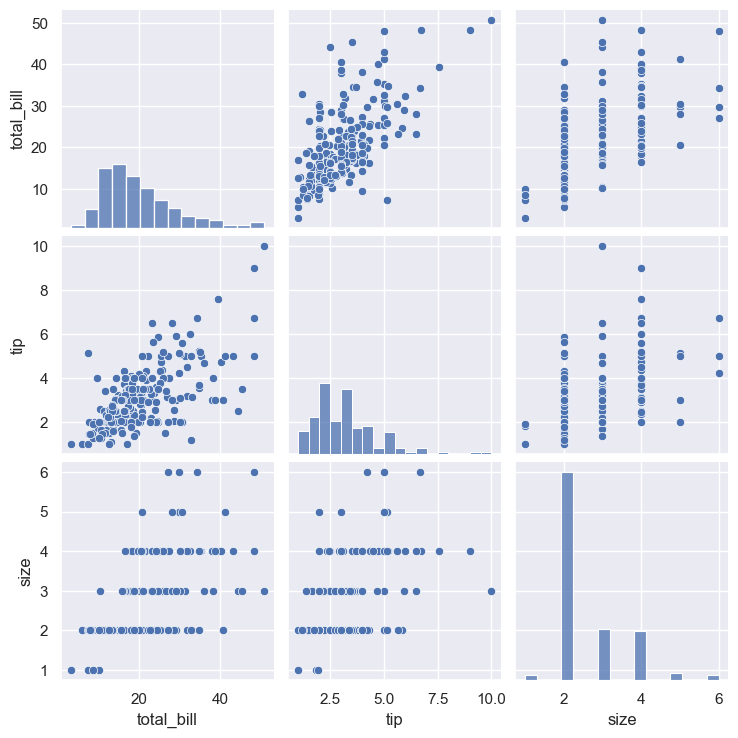

In [24]:
sns.pairplot(data=rest);

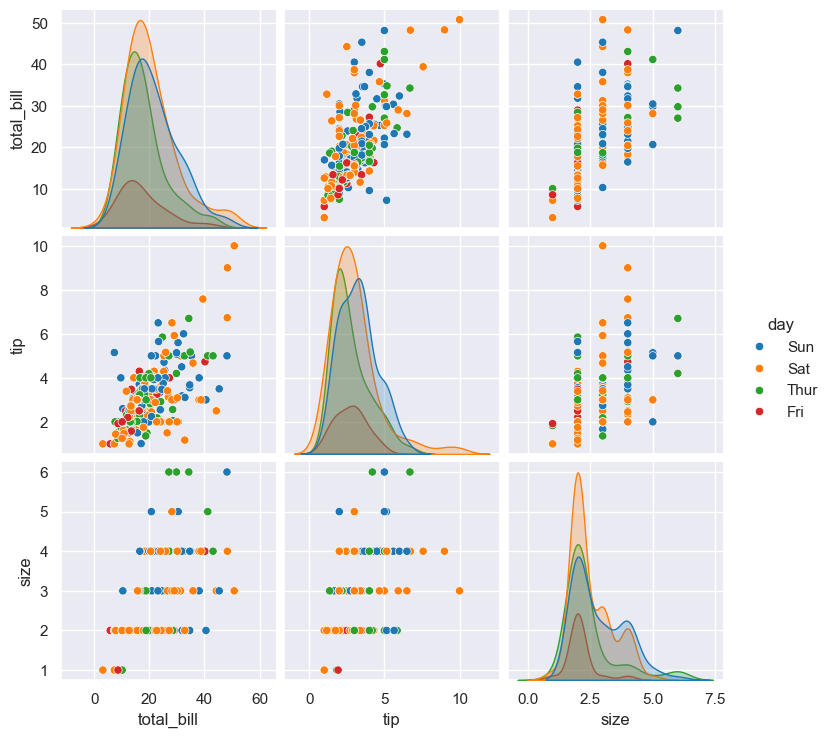

In [25]:
sns.pairplot(data=rest, hue='day', palette='tab10');

# <span style='color: purple'>Работа с категориальными признаками

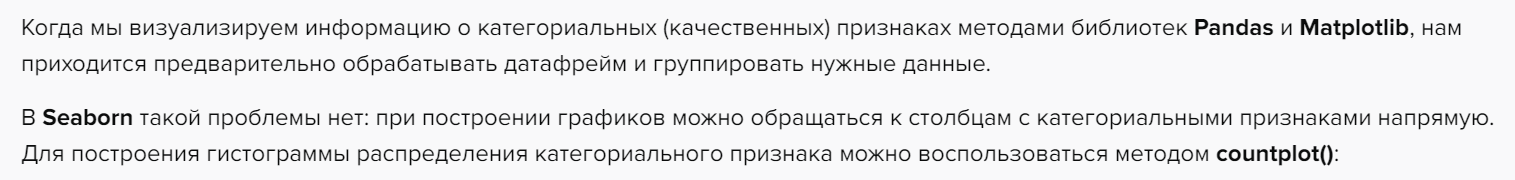

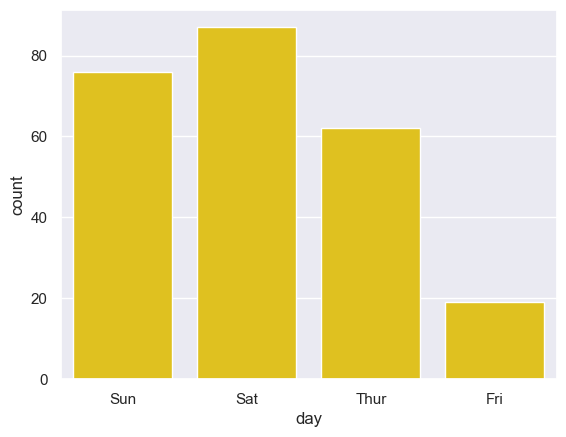

In [26]:
sns.countplot(data=rest, x='day', color='gold');

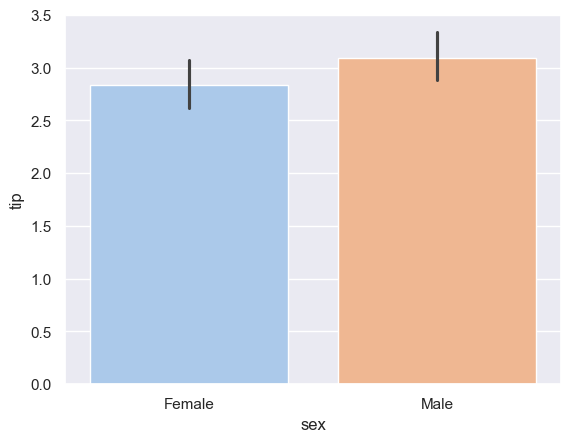

In [27]:
sns.barplot(data=rest, x='sex', y='tip', hue='sex', palette='pastel');

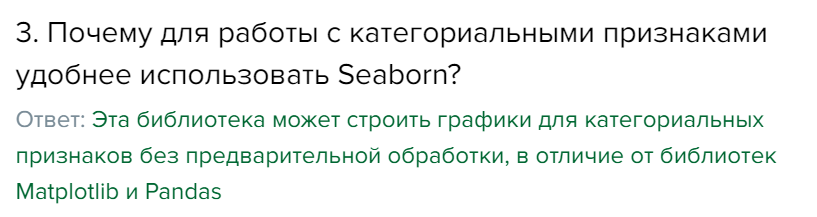

# <span style='color: purple'>Библиотека Plotly

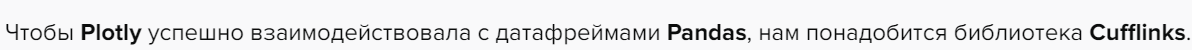

In [28]:
!pip install -q plotly
!pip install -q cufflinks

In [29]:
# Настраиваем отображение, подключаем библиотеки
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [30]:
# rest.iplot()
# rest.iplot(kind='bubble', x='total_bill', y='size', size='tip')

In [31]:
# P.S. почему-то графики не отображаются, показывается лишь белое пространство

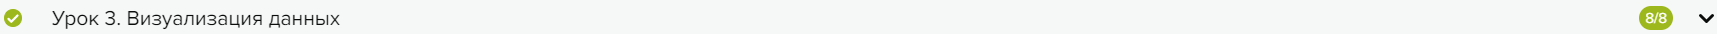